# ※ 필요한 패키지 및 데이터 불러오기

In [18]:
# 모듈 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('./output/daegu.csv', encoding = 'cp949')

### 아래의 전처리부분을 전부 실행하면 daegu_final.csv 파일이 생성됨
### 파일이 있으면 여기를 데이터 프레임을 불러온 뒤 EDA2로 넘어가는 것이 빠름

In [3]:
df_final = pd.read_csv('./output/daegu_final.csv')

# <hr>

# Preprocessing 1
#### Period
- 2022-05-06

#### Index
0. [전처리 전](#0-전처리-전)

1. [Column : hour](#1-column--hour)

2. [Column : lightning](#2-column--lightning)

3. [Column : condtion](#3-column--condition)

4. [Column : month](#4-column--month)

5. [전처리 후](#5-전처리-후)

###### [다음 파트로](#eda--preprocessing-2)

## 0. 전처리 전

In [4]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,100.0,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,200.0,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,300.0,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,400.0,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,1900.0,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,2000.0,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,2100.0,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,2200.0,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [5]:
# 시간 단위가 100 단위로 되어 있음
# 100으로 나눠 정수 형태의 정시로 표현
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [6]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [7]:
# lightning NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [8]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [9]:
# NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환

df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [10]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4.0,2022,구지면


## 4. Column : month
- 월을 정수형으로 표현

In [11]:
# Month 데이터 타입 정수형으로 변환

df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [12]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


## 5. 전처리 후

In [13]:
df_pre = df4
df_pre

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [14]:
# 메모리 정리를 위해 선언했던 기존 데이터들 제거

del(df)
del(df1)
del(df2)
del(df3)
del(df4)

# <hr>

# EDA & Preprocessing 2
> ###### made by ssj

#### Period
- 2022.05.06 ~ 2022.05.12

#### Index
1. [year](#1-year)

2. [month](#2-month)

3. [day](#3-day)

4. [hour](#4-hour)

5. [date](#5-date)

6. [rainfall](#6-rainfall)
    - 6-1. [rainfall processing](#6-1-rainfall-preprocessing)
<br><br>
7. [tempreture](#7-tempreture)

8. [lightning](#8-lightning)

9. [humidity](#9-humidity)
    - 9-1. [humidity processing](#9-1-humidity-preprocessing)
<br><br>
10. [wind](#10-wind)
    - 10-1. [wind speed](#10-1-windspeed)
    - 10-2. [wind direction](#10-2-winddirection)
    - 10-3. [wind preprocessing](#10-3-windpreprocessing-공사중)
<br><br>
11. [condition](#11-condition)
<br>
###### [이전 파트로](#preprocessing-1)
###### [다음 파트로](#preprocessing-3)

#### 1. year
요약
- 값이 없는 None이 없음
- 2010년부터 2022년까지 존재
- 2010년과 2022년은 모든 월이 있는게 아니므로 일수가 적음
- 윤년에 해당하는 날은 하루치인 296개의 데이터가 더 존재

In [21]:
# year에서 결측치(NA) 카운트 합
# 결측치 수 확인

df_pre['year'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


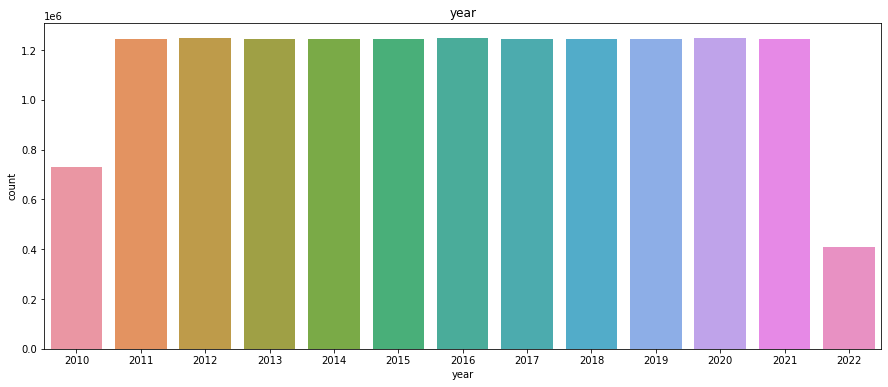

In [22]:
# 연 단위 카운트 그래프 생성
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['year'])
plt.title('year')
plt.show()

In [23]:
# 각 연도별 데이터의 수
temp = []
for i in range(2010,2023):
    result = df_final[df_final['year'] == i].size
    print("{0:>4}년 :".format(i), "{0:>8}".format(result))
    temp.append(result)

2010년 : 10939680
2011년 : 18658800
2012년 : 18709920
2013년 : 18658800
2014년 : 18658800
2015년 : 18658800
2016년 : 18709920
2017년 : 18658800
2018년 : 18658800
2019년 : 18658800
2020년 : 18709920
2021년 : 18658800
2022년 :  6134400


#### 2. month
요약
- 2010년에는 6월부터 데이터가 존재
- 2022년에는 5월부터 데이터가 없음

In [15]:
# N/A 값 있는지 여부 확인
df_pre['month'].isna().sum()

0

In [16]:
# 최대값과 함께 넣으면 해당하는 원형에서 해당하는 위치의 x좌표 y좌표를 반환
def encode_sin_cos(df_,col_n,max_val):
    df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
    df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
    
    return df_

df_month = df_pre[['day','hour','month','year']]

# 1년은 12개월이므로 월 데이터의 x,y 좌표 생성
data_month = encode_sin_cos(df_month,'month',12)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)


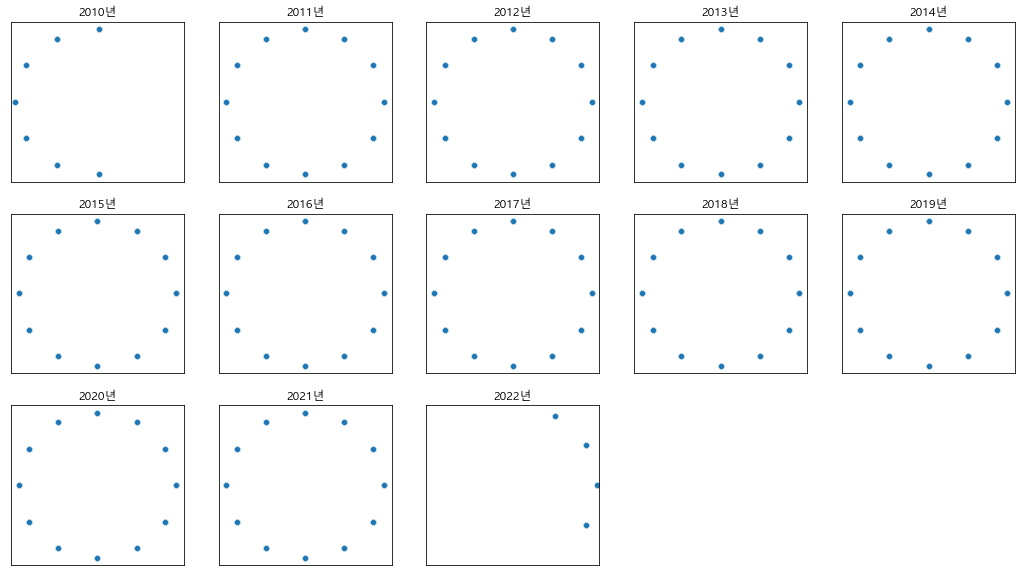

In [17]:
# 2010년부터 2022년까지의 데이터 존재
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# 각각의 연도에 따라 각각의 월이 존재하는지 확인
fig = plt.figure(figsize=(18,10))
plt.rc('font', family = 'Malgun Gothic')
for n,y in enumerate(year):
    ax = plt.subplot(3,5,n+1)
    sns.scatterplot(x="month_sin",y="month_cos",data=data_month[data_month['year'] == y])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(str(y)+"년")

# 2010년은 6월부터 2022년은 4월까지의 데이터만 존재

#### 3. day
요약
- 1일부터 28일까지 동일한 값이 나옴
- 29, 30, 31로 갈수록 count가 점점 줄어듦

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


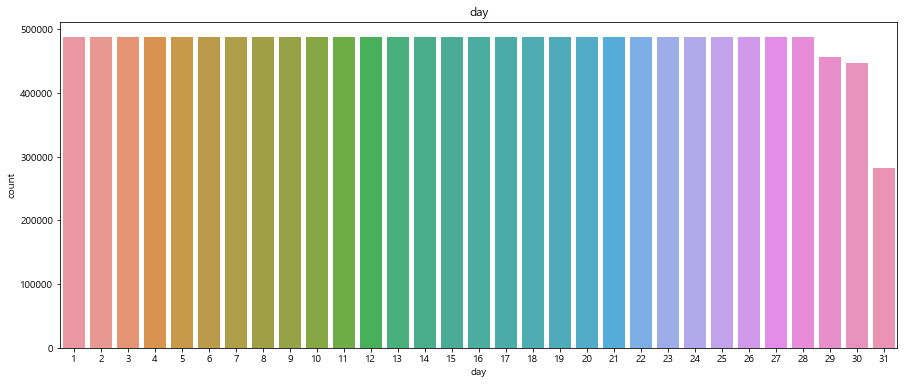

In [26]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['day'])
plt.title('day')
plt.show()

In [27]:
for i in range(1,32):
    result = df_final[df_final['day'] == i].size
    print("{0:>2}일".format(i), result, end='\t\t')
    if i % 4 == 0:
        print('')

 1일 7310160		 2일 7310160		 3일 7310160		 4일 7310160		
 5일 7310160		 6일 7310160		 7일 7310160		 8일 7310160		
 9일 7310160		10일 7310160		11일 7310160		12일 7310160		
13일 7310160		14일 7310160		15일 7310160		16일 7310160		
17일 7310160		18일 7310160		19일 7310160		20일 7310160		
21일 7310160		22일 7310160		23일 7310160		24일 7310160		
25일 7310160		26일 7310160		27일 7310160		28일 7310160		
29일 6850080		30일 6696720		31일 4242960		

#### 4. hour
요약
- None 값이 포함되어 있지 않음
- 모든 시간에 대해 동일한 수의 데이터 존재

In [28]:
# none값의 데이터가 있는지 확인
df_pre['hour'].isna().sum()

0

In [29]:
# 0시부터 23시까지의 데이터가 존재
list_temp = list(df_pre['hour'].unique())
for i in list_temp:
    print(i, end='\t')

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	

In [30]:
# 각각의 시각은 동일한 수가 존재
(df_pre['hour'] == 0).sum() == (df_pre['hour'] == 1).sum() == (df_pre['hour'] == 2).sum()\
    == (df_pre['hour'] == 3).sum() == (df_pre['hour'] == 4).sum() == (df_pre['hour'] == 5).sum()\
    == (df_pre['hour'] == 6).sum() == (df_pre['hour'] == 7).sum() == (df_pre['hour'] == 8).sum()\
    == (df_pre['hour'] == 9).sum() == (df_pre['hour'] == 10).sum() == (df_pre['hour'] == 11).sum()\
    == (df_pre['hour'] == 12).sum() == (df_pre['hour'] == 13).sum() == (df_pre['hour'] == 14).sum()\
    == (df_pre['hour'] == 15).sum() == (df_pre['hour'] == 16).sum() == (df_pre['hour'] == 17).sum()\
    == (df_pre['hour'] == 18).sum() == (df_pre['hour'] == 19).sum() == (df_pre['hour'] == 20).sum()\
    == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 23).sum()

True

#### 5. Date
- 년,월,일,시간을 합쳐서서 데이터 타입이 datetime인 새로운 컬럼 생성

In [31]:
df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

#### 6. rainfall
요약
- 강우량 데이터 (단위:mm)
- 강수량을 측정하지 않은 경우 : -1
- 최대 강수량 : 62.099998mm/h

In [32]:
print('결측치 수 : ',df_pre['rainfall'].isna().sum())
a = list(df_pre[df_pre['rainfall'] == -1].index)
print('미측정 수 : ',len(a))
a = list(df_pre[df_pre['rainfall'] == 0].index)
print('비가 오지 않은 날 : ',len(a))

결측치 수 :  0
미측정 수 :  23306
비가 오지 않은 날 :  13990071


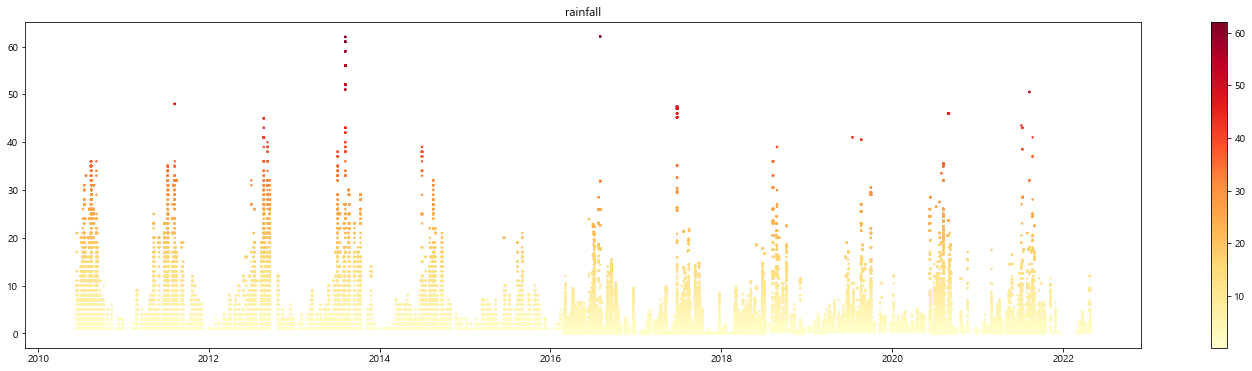

강우량의 0을 제외한 최소값 : 0.1 mm
강우량의 최댓값 : 62.099998 mm


In [45]:
# 강수량에 대한 데이터를 그래프에 점을 찍어 표현
fig = plt.figure(figsize=(25,6))
temp = df_pre[(df_pre['rainfall'] != 0) & (df_pre['rainfall'] != -1)]
plt.scatter(temp['datetime'], temp['rainfall'], s=2, c=temp['rainfall'], cmap='YlOrRd')
plt.colorbar()
plt.title('rainfall')
plt.show()
print('강우량의 0을 제외한 최소값 :',temp['rainfall'].min(),'mm')
print('강우량의 최댓값 :',temp['rainfall'].max(),'mm')

#### 6-1. rainfall preprocessing
요약
- 앞, 뒤에서 측정한 경우
    - 앞, 뒤의 평균으로 강수량을 계산
- 연속적으로 측정하지 않은 경우
    - 바로 직전과 직후의 강우량이 0이라면 비가 오지 않았을 확률이 매우 높음 -> 0으로 변경
    - 바로 직전과 직후에 비가 왔다면 어떤식으로 데이터를 변경할지 고민해봐야함
        - 해당 경우는 없는 것으로 확인됨

In [27]:
# 강수량을 측정하지 않은 시간대의 index
a = list(df_pre[df_pre['rainfall'] == -1].index)

list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

2701


In [28]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [29]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'rainfall'] = (df_pre.loc[i-1,'rainfall'] + df_pre.loc[i+1,'rainfall']) / 2

In [30]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    # 직전, 직후가 0인 경우
    if (df_pre.loc[i[0]-1,'rainfall'] == 0) & (df_pre.loc[i[-1]+1,'rainfall'] == 0):
        for j in i:
            df_pre.loc[j,'rainfall'] = 0
    # 직전 또는 직후가 0이 아닌 경우
    else:
        print(i)

# 직전 또는 직후에 비가 온 case는 존재하지 않음

In [31]:
# rainfall이 -1인 경우가 남아있는지 확인
(df_pre['rainfall'] == -1).sum()

0

#### 7. tempreture
요약
- -50, -1 은 결측치로 생각됨
- 0은 어떤 값인지 확인이 필요 (가장 많은 count를 보유 -> 의미가 있을 것)
- 최고기온 : 40.4℃
- 최저기온 : -16℃

In [32]:
df_pre['temp'] = df_pre['temp'].round(1)

c:\git_project\Team_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


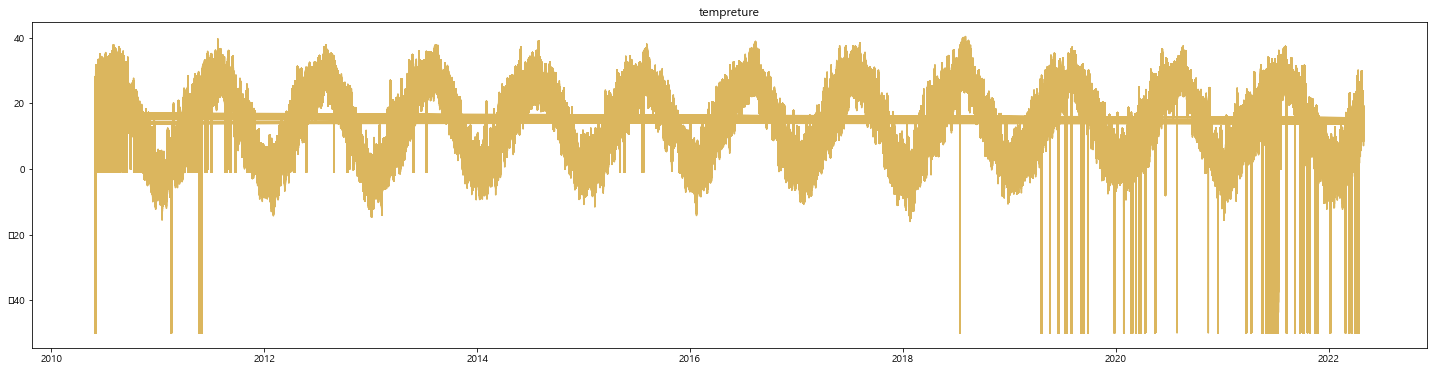

In [33]:
fig = plt.figure(figsize=(25,6))
plt.plot(df_pre.datetime, df_pre.temp, color='#DBB65E')
plt.title('tempreture')
plt.show()

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


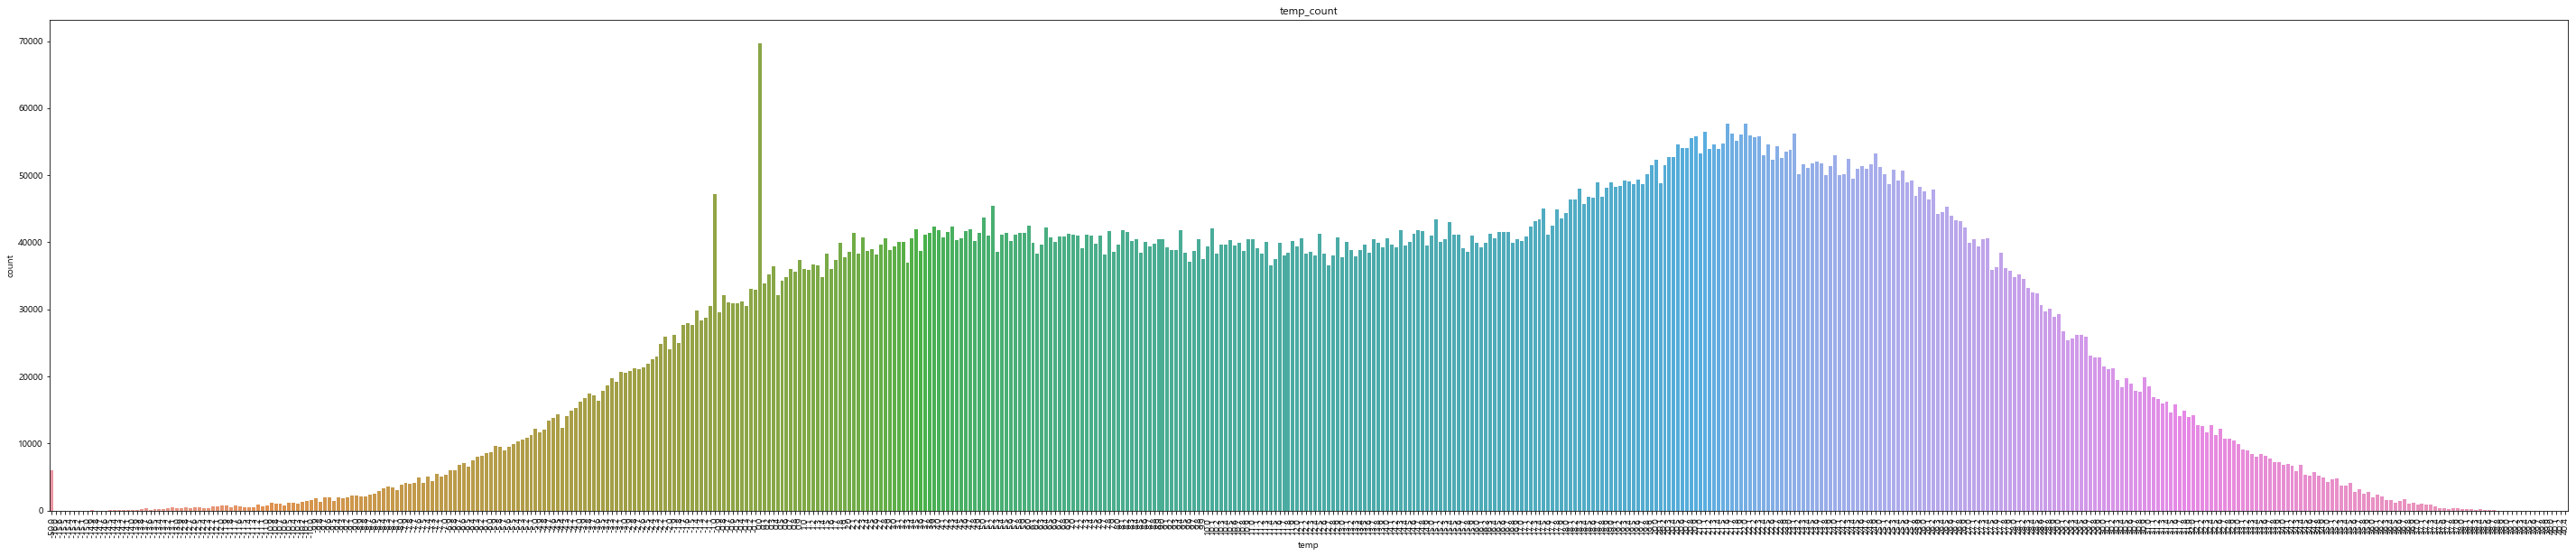

In [34]:
df_pre['temp'].sort_values().unique()

fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [35]:
print('-50 : ',df_pre[df_pre['temp'] == -50].shape[0])
print('-1  : ',df_pre[df_pre['temp'] == -1].shape[0])
print('0  : ',df_pre[df_pre['temp'] == 0].shape[0])

-50 :  6062
-1  :  47171
0  :  69673


In [36]:
print('최저 기온 : ',df_pre[(df_pre['temp'] != -50) & (df_pre['temp'] != -1)]['temp'].min())
print('최고 기온 : ',df_pre['temp'].max())

최저 기온 :  -16.0
최고 기온 :  40.4


#### 7-1. tempreture preprocessing
요약
- 결측치 혹은 잘못된 값은 -50, -8.1, -1, 0 으로 4가지 경우가 존재
- 해결방법
    - 4가지 경우가 연속으로 존재하는 경우를 확인
        - 한가지 경우가 있었으며 -1만 고치는 방향으로 결정
    - 각각의 경우가 연속해서 존재할 경우 전, 후 값을 선형으로 연결
    - 연속해서 -1 혹은 0이 존재할 경우
        - 전후 값과의 차이가 3도 이하일 경우 정상적인 값으로 판단

In [37]:
list_50 = list(df_pre[df_pre['temp'] == -50].index)
list_1 = list(df_pre[df_pre['temp'] == -1].index)
list_0 = list(df_pre[df_pre['temp'] == 0].index)

In [38]:
a = list_50 + list_0 + list_1
a.sort()

In [39]:
# 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

In [40]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [41]:
list_real1 = []
for i in list_1:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

list_real0 = []
for i in list_0:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

In [42]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
            df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

In [43]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'temp']
    end = df_pre.loc[i[-1]+1,'temp']
    c = (end - start)/(n+1)
    start = start + c
    for j in i:
        df_pre.loc[j,'temp'] = round(start,0)
        start = start + c

In [44]:
df_pre[df_pre['temp']==-50]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime


c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


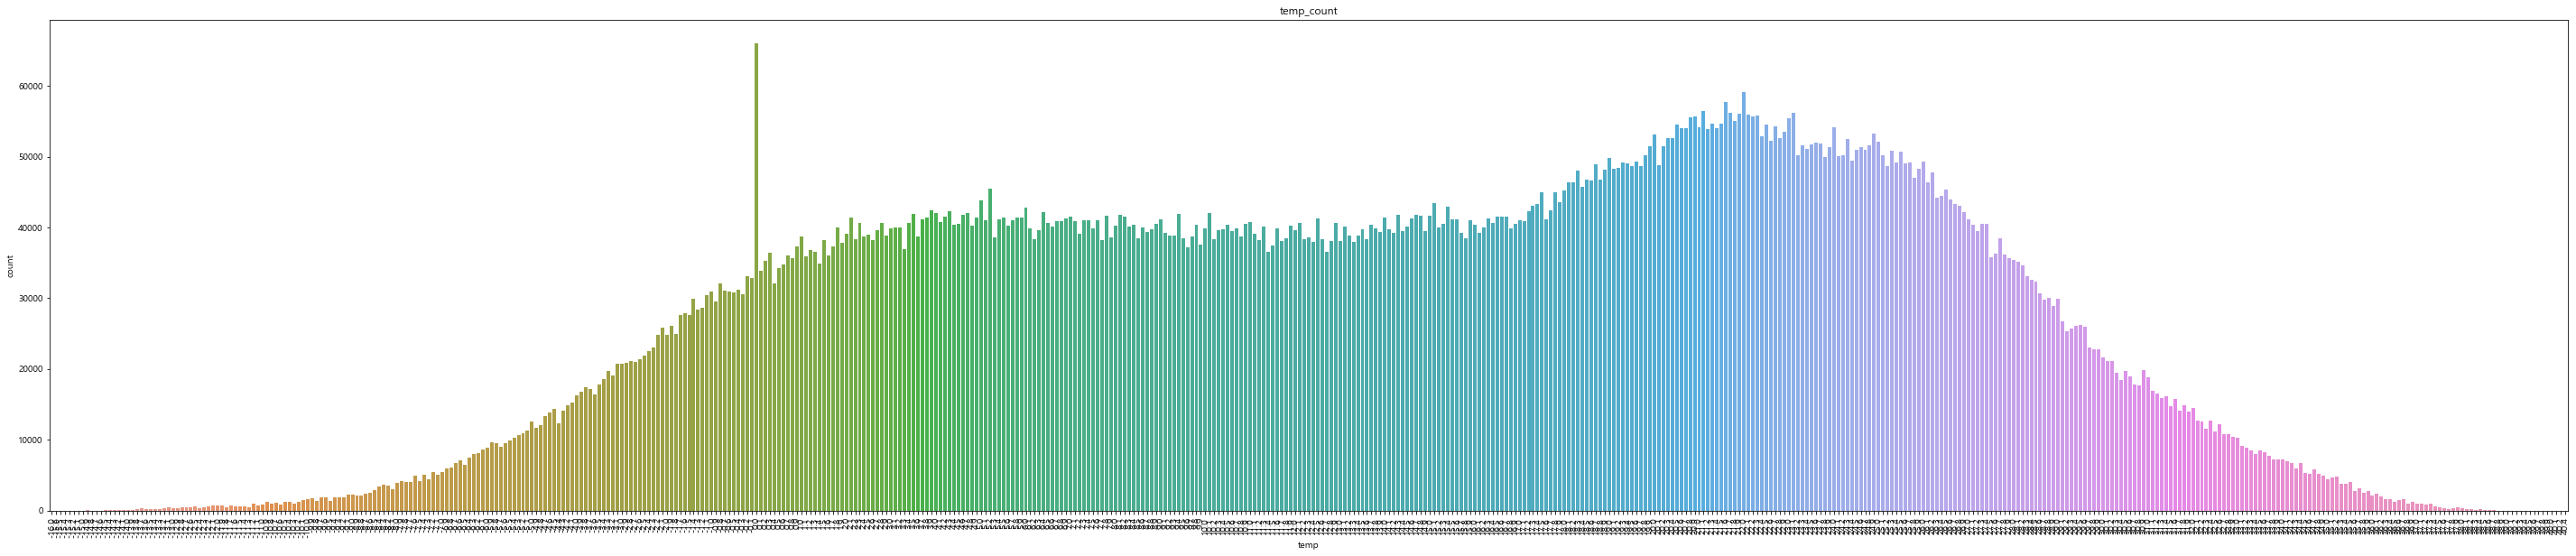

In [45]:
df_pre['temp'].sort_values().unique()

fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [46]:
df_pre[df_pre['temp'] == 0]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime
4287,26,15,0.0,0.0,-1,32.0,53.0,390.0,1,11,2010,동인동,2010-11-26 15:00:00
4336,28,16,0.0,0.0,-1,37.0,53.0,390.0,1,11,2010,동인동,2010-11-28 16:00:00
4579,8,19,0.0,0.0,-1,55.0,3.7,273.0,1,12,2010,동인동,2010-12-08 19:00:00
4609,10,1,0.0,0.0,-1,50.0,0.4,0.0,3,12,2010,동인동,2010-12-10 01:00:00
4645,11,13,0.0,0.0,-1,22.0,3.1,279.0,1,12,2010,동인동,2010-12-11 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14830198,2,22,0.0,0.0,-1,71.0,0.9,358.0,-1,3,2022,구지면,2022-03-02 22:00:00
14830216,3,16,0.0,0.0,-1,71.0,0.4,148.0,-1,3,2022,구지면,2022-03-03 16:00:00
14830291,6,19,0.0,0.0,-1,52.0,2.0,7.0,-1,3,2022,구지면,2022-03-06 19:00:00
14830338,8,18,0.0,0.0,-1,75.0,0.0,0.0,-1,3,2022,구지면,2022-03-08 18:00:00


In [47]:
i = 4287
df_pre.loc[i-2:i+2,"temp"]

4285    2.6
4286    1.6
4287    0.0
4288   -0.3
4289   -1.0
Name: temp, dtype: float64

In [48]:
list_0 = list(df_pre[df_pre['temp'] == 0].index)
for i in list_0:
    if df_pre.loc[i-1,'temp'] * df_pre.loc[i+1,'temp'] < 0:
        df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


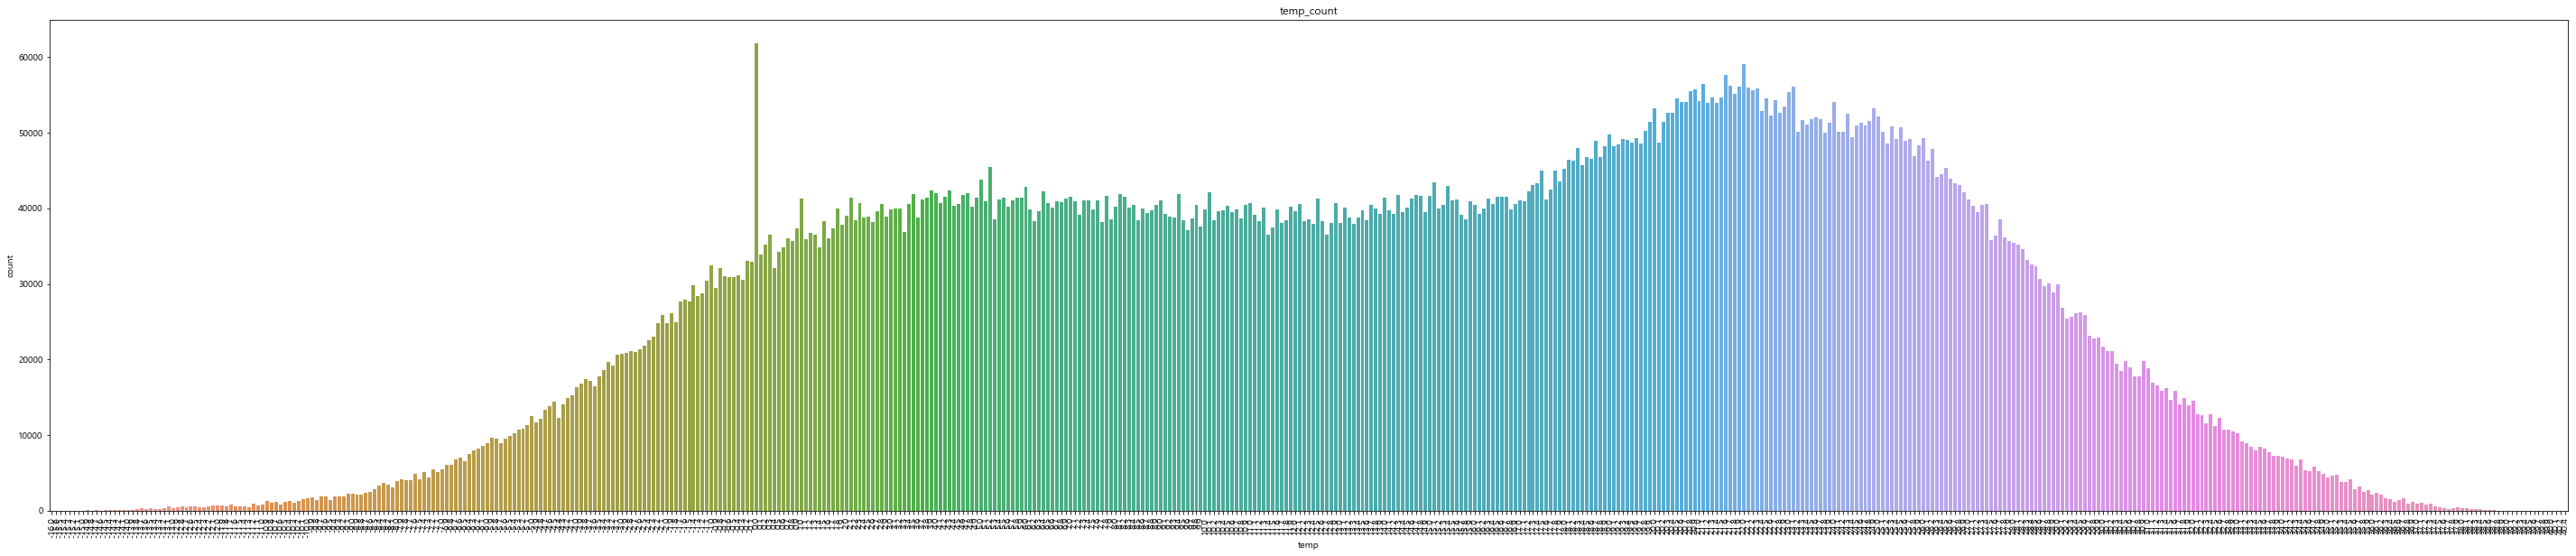

In [49]:
df_pre['temp'].sort_values().unique()

fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [50]:
df_pre[df_pre['temp'] == 0].shape[0]

61851

In [51]:
list_temp = list(df_pre[df_pre['temp'] == -8.1].index)

list_8 = []
for i in list_temp:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 5) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 5):
        list_8.append(i)

for i in list_8:
    df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 1)

In [52]:
df_pre.loc[list_8,:]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime
14293060,20,4,0.0,26.4,-1,59.0,0.7,16.0,-1,6,2020,유가읍,2020-06-20 04:00:00
14501956,20,4,0.0,26.4,-1,59.0,0.7,16.0,-1,6,2020,현풍읍,2020-06-20 04:00:00
14815300,20,4,0.0,26.4,-1,59.0,0.7,16.0,-1,6,2020,구지면,2020-06-20 04:00:00


#### 8. lightning
요약
- 2018년 10월까지만 제공
- 전체 데이터 중 약 37.86%는 데이터가 없는 상태
- 추가적인 데이터를 찾지 않는 이상 사용하기 애매함?

In [53]:
df_pre['lightning'].unique()

array([-1,  0,  1])

In [54]:
print('결측된 데이터 비율 :', round(df_pre[(df_pre['lightning'] == -1)].shape[0]/df_pre.shape[0]*100,2), '%')

결측된 데이터 비율 : 37.86 %


#### 9. humidity
요약
- 0~100까지의 비율(%)로 값들이 존재
- -1은 결측값
- 습도가 0인 경우가 많음
    - 습도가 0일 가능성이 거의 없으므로 이 중 대부분은 결측치일것
    - 습도가 0%인 경우가 682개
    - 습도가 1%인 경우가 42개

In [55]:
df_pre['humidity'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

In [56]:
print('-1 :',df_pre[df_pre['humidity'] == -1].shape[0])
print('0 :',df_pre[df_pre['humidity'] == 0].shape[0])
print('1 :',df_pre[df_pre['humidity'] == 1].shape[0])
print('2 :',df_pre[df_pre['humidity'] == 2].shape[0])
print('3 :',df_pre[df_pre['humidity'] == 3].shape[0])

-1 : 30222
0 : 682
1 : 42
2 : 66
3 : 238


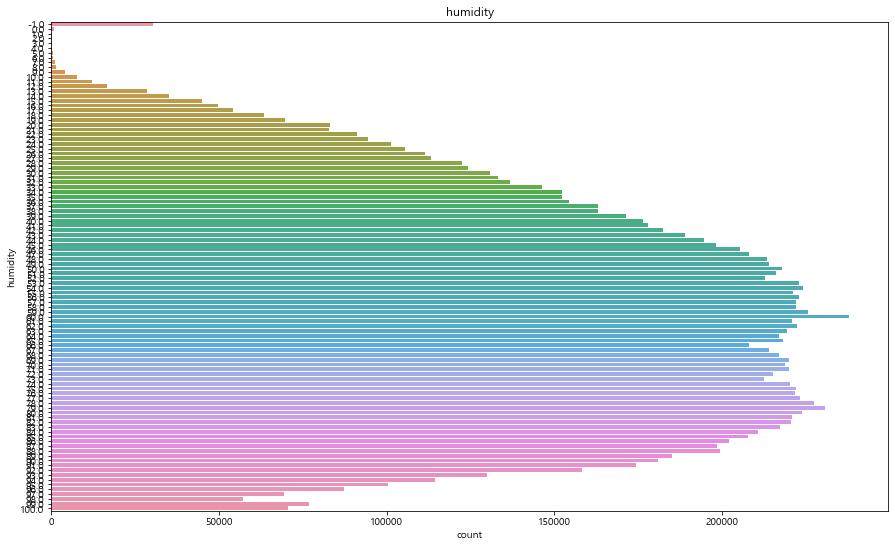

In [57]:
fig = plt.figure(figsize=(15,9))
sns.countplot(data=df_pre, y='humidity')
plt.title('humidity')
plt.show()

#### 9-1. humidity preprocessing
요약
- 0일 경우
    - 0일 가능성이 거의 없지만 실제로 있을 수도 있음
    - 0일 경우의 전후 1시간을 비교했을때 차이가 거의 없는 경우가 2가지 존재
    - 그외의 경우는 모두 큰 차이가 나는 결측값으로 확인됨
    - 전후 습도의 평균으로 계산
- -1일 경우
    - 전후로 -1이 아닌 경우들을 선형으로 값을 설정


In [58]:
list_1 = list(df_pre[(df_pre['humidity'] == -1)].index)
list_0 = list(df_pre[(df_pre['humidity'] == 0)].index)

In [59]:
for i in list_1:
    if i-1 in list_0:
        print(i-1, i)
    if i+1 in list_0:
        print(i, i+1)

14690309 14690310


In [60]:
#  둘 중 에는 -1 만 수정하면 될 듯
df_pre.loc[14690307:14690311,:]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime
14690307,15,3,0.0,8.3,0,4.0,0.8,353.0,2,2,2018,하빈면,2018-02-15 03:00:00
14690308,15,4,0.0,9.3,0,2.0,2.5,348.0,2,2,2018,하빈면,2018-02-15 04:00:00
14690309,15,5,0.0,9.2,0,-1.0,3.3,346.0,3,2,2018,하빈면,2018-02-15 05:00:00
14690310,15,6,0.0,9.1,0,0.0,2.7,327.0,3,2,2018,하빈면,2018-02-15 06:00:00
14690311,15,7,0.0,8.3,0,2.0,2.9,314.0,3,2,2018,하빈면,2018-02-15 07:00:00


In [61]:
a = []
for i in list_0:
    a.append(abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']))

In [62]:
j = list_0[0]
for i in list_0[1:]:
    if abs(i-j) == 1:
        print(i,j)
    j=i

In [63]:
set(a)

{3.0,
 6.0,
 87.0,
 88.0,
 90.0,
 91.0,
 92.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0,
 101.0,
 104.0,
 106.0,
 108.0,
 110.0,
 113.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 128.0,
 129.0,
 132.0,
 133.0,
 135.0,
 137.0,
 141.0,
 155.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 179.0,
 181.0}

In [64]:
a = []
for i in list_0:
    if abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']) > 10:
        a.append(i)

for i in a:
    df_pre.loc[i,'humidity'] = ( df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity'] ) /2

In [65]:
df_pre[df_pre['humidity']==0]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime
14689853,27,5,0.0,1.8,0,0.0,0.9,180.0,1,1,2018,하빈면,2018-01-27 05:00:00
14690310,15,6,0.0,9.1,0,0.0,2.7,327.0,3,2,2018,하빈면,2018-02-15 06:00:00


In [66]:
# 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in list_1:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

7135


In [67]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [68]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in list_1:
    if i not in list_temp:
        df_pre.loc[i,'humidity'] = (df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity']) / 2

In [69]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'humidity']
    end = df_pre.loc[i[-1]+1,'humidity']
    a = (end - start)/(n+1)

    for j in i:
        df_pre.loc[j,'humidity'] = df_pre.loc[j-1,'humidity'] + a

In [70]:
df_pre[df_pre['humidity'] == -1]

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime


#### 10. wind
요약
- 풍속과 풍향의 데이터가 2010년 12월 6일 6시 까지의 데이터가 이상함
- None 이 되도록 수정

##### 풍력 등급
|등급|10분간 평균풍속(10m/s)|상세설명|
|---|---|---|
|0|0.3미만|연기가 똑바로 올라간다.|
|1|0.3~1.6미만|연기가 옆으로 쓰러진다.|
|2|1.6~3.4미만|얼굴에 바람기를 느끼고 나뭇잎이 쓰러진다.|
|3|3.4~5.5미만|나뭇잎이나 가느다란 가지가 끊임없이 흔들린다.|
|4|5.5~8.0미만|먼지가 일고 종이 조각이 날아오르며 작은 나뭇가지가 흔들린다.|
|5|8.0~10.8미만|연못의 수면에 잔물결이 일며 나무가 흔들리는 것이 눈에 보인다.|
|6|10.8~13.9미만|큰 가지가 움직이고,우산을 쓰기 어려우며 전선이 운다.|
|7|13.9~17.2미만|수목 전체가 흔들린다.|
|8|17.2~20.8미만|작은 가지가 부러지며,바람을 향해 걸을 수 없다.|
|9|20.8~24.5미만|인가에 약간의 피해를 준다.|
|10|24.5~28.5미만|수목의 뿌리가 뽑히며 인가에 큰 피해가 발생한다.|
- 출처 : http://hosting.weatherimc.co.kr/con/forecast/wind.html?jijum_code=53

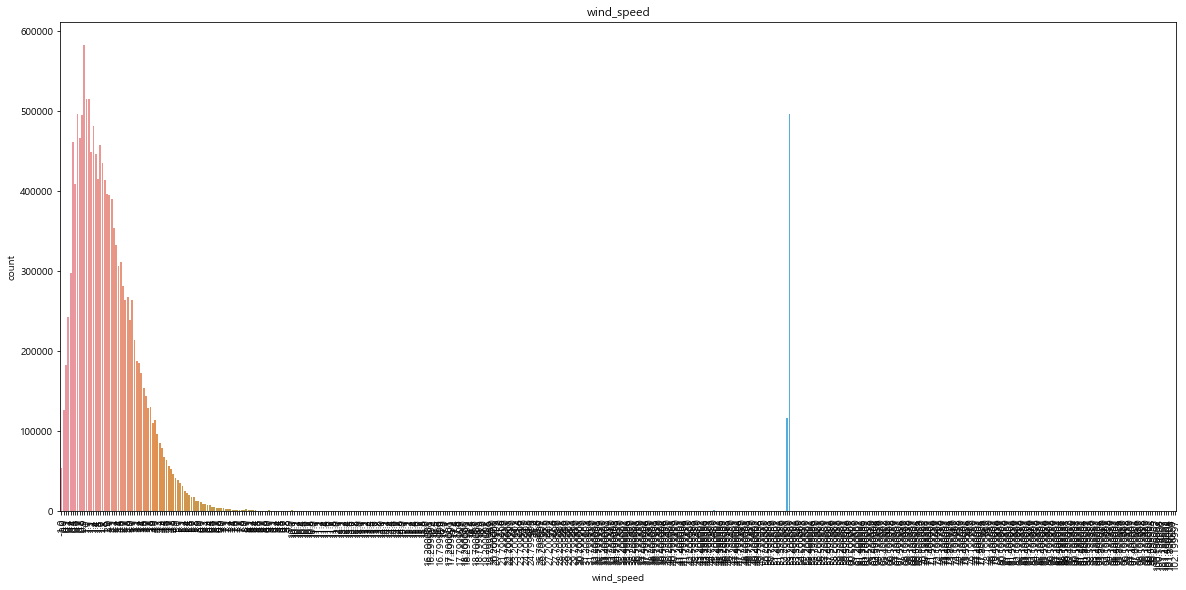

In [71]:
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

In [72]:
values = list(df_pre['wind_speed'].sort_values().unique())

for i in values:
    print(i,':',df_pre[df_pre['wind_speed'] == i].shape[0])

-1.0 : 53229
0.0 : 125826
0.1 : 182968
0.2 : 243233
0.3 : 297996
0.4 : 462013
0.5 : 408914
0.6 : 497088
0.7 : 466590
0.8 : 495524
0.9 : 583077
1.0 : 515226
1.1 : 515559
1.2 : 449330
1.3 : 482285
1.4 : 446664
1.5 : 415608
1.6 : 457496
1.7 : 435187
1.8 : 414588
1.9 : 396511
2.0 : 394726
2.1 : 389785
2.2 : 353457
2.3 : 333379
2.4 : 306202
2.5 : 311862
2.6 : 282064
2.7 : 263899
2.8 : 267668
2.9 : 238809
3.0 : 264545
3.1 : 213721
3.2 : 187893
3.3 : 184718
3.4 : 172242
3.5 : 153899
3.6 : 143346
3.7 : 128767
3.8 : 129490
3.9 : 110455
4.0 : 113273
4.1 : 96148
4.2 : 84632
4.3 : 78456
4.4 : 67836
4.5 : 63694
4.6 : 56100
4.7 : 52226
4.8 : 45936
4.9 : 40745
5.0 : 38396
5.1 : 34329
5.2 : 30697
5.3 : 25009
5.4 : 23006
5.5 : 20403
5.6 : 17155
5.7 : 17343
5.8 : 12971
5.9 : 12772
6.0 : 11116
6.1 : 9027
6.2 : 8240
6.3 : 6860
6.4 : 6994
6.5 : 5507
6.6 : 4502
6.7 : 4256
6.8 : 3845
6.9 : 3160
7.0 : 3472
7.1 : 2453
7.2 : 2881
7.3 : 2038
7.4 : 1665
7.5 : 1437
7.6 : 1397
7.7 : 1346
7.8 : 1330
7.9 : 1032
8.0 :

풍속에 말도 안되는 값들이 많이 존재
데이터를 살펴보니 2010년 12월 6일 6시까지의 데이터가 이상함
    -> none값을 가지도록 수정

In [73]:
df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

list_temp = list(df_pre[df_pre['datetime'] < datetime.datetime(2010,12,6,7)].index)
df_pre.loc[list_temp,['wind_speed','wind_direction']] = None
df_pre

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime
0,1,0,0.0,16.5,-1,53.0,NaN,NaN,1,6,2010,동인동,2010-06-01 00:00:00
1,1,1,0.0,18.1,-1,49.0,NaN,NaN,1,6,2010,동인동,2010-06-01 01:00:00
2,1,2,0.0,19.7,-1,46.0,NaN,NaN,1,6,2010,동인동,2010-06-01 02:00:00
3,1,3,0.0,20.8,-1,41.0,NaN,NaN,1,6,2010,동인동,2010-06-01 03:00:00
4,1,4,0.0,22.2,-1,36.0,NaN,NaN,2,6,2010,동인동,2010-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.7,-1,71.0,2.1,335.0,-1,4,2022,구지면,2022-04-30 19:00:00
14831612,30,20,0.0,11.0,-1,65.0,2.2,339.0,-1,4,2022,구지면,2022-04-30 20:00:00
14831613,30,21,0.0,11.9,-1,61.0,2.2,338.0,-1,4,2022,구지면,2022-04-30 21:00:00
14831614,30,22,0.0,13.4,-1,53.0,2.0,351.0,-1,4,2022,구지면,2022-04-30 22:00:00


#### 10-1. wind_speed
요약
- 최고 풍속 : 18.9 m/s
- 평균 풍속 : 4m/s
- 결측치는 -1 로 표현

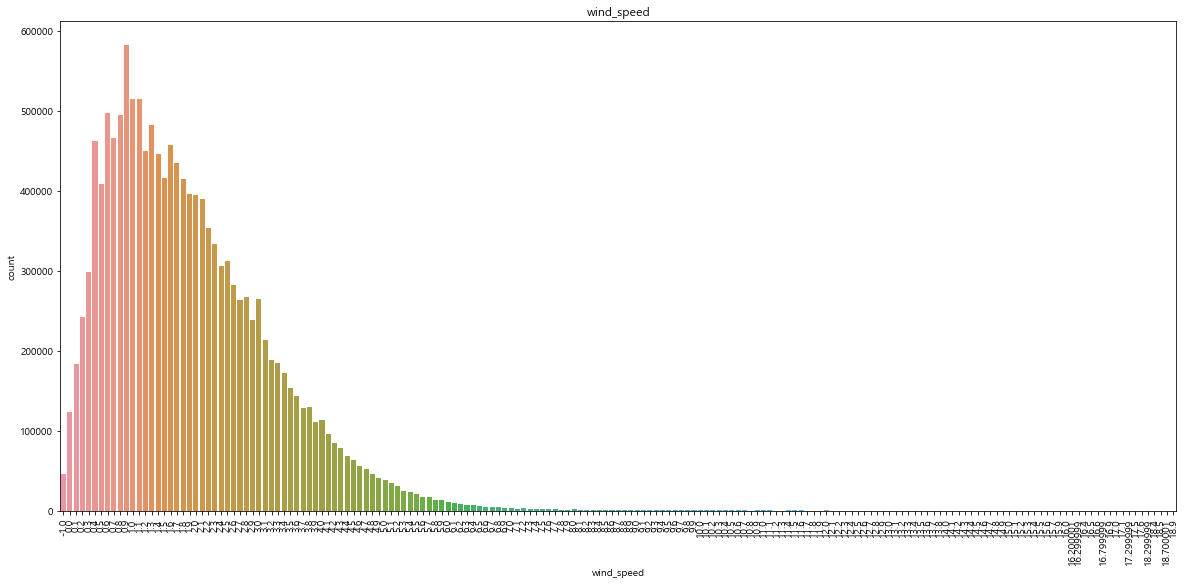

In [74]:
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

In [75]:
print('최고 풍속 :',df_pre['wind_speed'].max(), 'm/s')
print('평균 풍속 :',df_pre[df_pre['wind_speed'] != -1]['wind_speed'].mean(), 'm/s')

최고 풍속 : 18.9 m/s
평균 풍속 : 1.8921555349644361 m/s


#### 10-2. wind_direction
요약
- 0 ~ 360의 각도 형식으로 표현
- 360'가 북쪽을 나타냄
- 결측치는 -1 로 표현

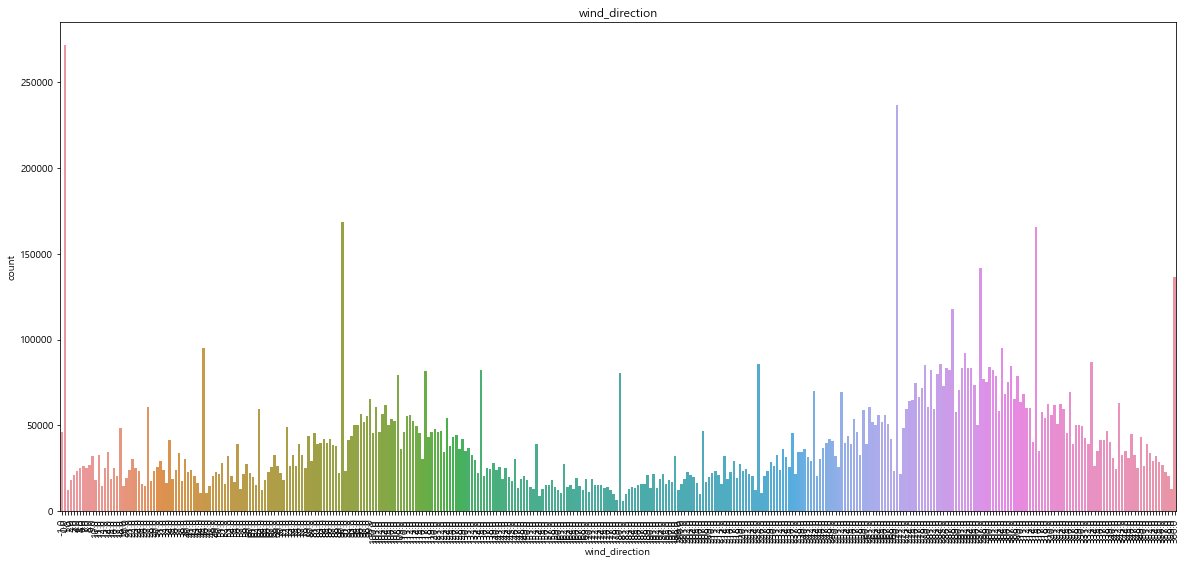

In [76]:
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_direction')
plt.xticks(rotation=90)
plt.title('wind_direction')
plt.show()

In [77]:
df_pre['wind_direction'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

In [78]:
print(' -1 : ',df_pre[df_pre['wind_direction'] == -1].shape[0])
print('  0 : ',df_pre[df_pre['wind_direction'] == 0].shape[0])
print('360 : ',df_pre[df_pre['wind_direction'] == 360].shape[0])

 -1 :  46129
  0 :  271489
360 :  136388


In [79]:
df_pre[df_pre['wind_direction'] == 360]['wind_speed'].sort_values().unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.2,  7.3,  7.4,  7.5,  7.7,  7.8,  7.9,
        8. ,  8.2,  9.3, 10. , 10.5, 11.1, 12. , 12.3, 14.5])

<AxesSubplot:xlabel='wind_direction', ylabel='Count'>

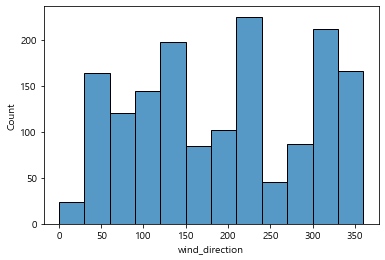

In [80]:
sns.histplot(data=df_pre[df_pre['wind_speed'] > 10.8]['wind_direction'])

#### 10-3. wind_preprocessing 공사중
요약
- 풍속의 경우
    - 풍향이 순간적으로 급하게 변화할 가능성은 적다고 가정
    - 결측치는 직전, 직후 값을 선형적으로 구현
- 풍향의 경우
    - 0 ~ 360의 값을 가지며 큰 폭으로 변화할 수 있음
    - 그렇다면 전처리를 어떻게 해야하는가?

In [81]:
print((df_pre['wind_speed'] == -1).sum())
print((df_pre['wind_direction'] == -1).sum())

45703
46129


In [82]:
a = list(df_pre[df_pre['wind_speed'] == -1]['wind_speed'].index)
list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

31529


In [83]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'wind_speed'] = (df_pre.loc[i-1,'wind_speed'] + df_pre.loc[i+1,'wind_speed']) / 2

In [84]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [85]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'wind_speed']
    end = df_pre.loc[i[-1]+1,'wind_speed']
    a = (end - start)/(n+1)

    for j in i:
        df_pre.loc[j,'wind_speed'] = df_pre.loc[j-1,'wind_speed'] + a


#### 11. condition
요약
- 결측치 값이 약 30퍼로 매우 많음
- 이것을 계속 사용하려면 추가적인 데이터 보급이 필요

In [86]:
df_pre['condition'].unique()

array([ 1,  2, -1,  4,  3])

In [87]:
print('결측된 데이터 비율 :',df_pre[df_pre['condition'] == -1].shape[0]/df_pre.shape[0] * 100, '%')

결측된 데이터 비율 : 29.851217830882355 %


# <hr>

# Preprocessing 3

#### Period
- 2022.05.09 ~ 2022.05.11

#### Index
1. [Heat Index](#1-heat-index)

2. [Discomfort Index](#2-discomfort-index)

3. [column rename](#3-column-rename)

###### [이전 파트로](#eda--preprocessing-2)
###### [다음 파트로](#eda-2)

## 1. Heat Index
- 열지수 : 기온과 습도에 따라 사람이 실제로 느끼는 더위를 지수화한 것
- ![](./img/HI.jpg)
    - 출처 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3801457/#r39
    - T is temperature in degrees F
    - RH is relative humidity in percent

##### 열 지수별 증상
|단계|지수 범위|설명|
|---|---|---|
|매우 높음|54이상|보통 사람이 열에 지속적으로 노출될 경우, 열사·일사병 위험이 매우 높음|
|높음|41 ~ 54 미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 일사병·열경련·일피폐 위험이 높음|
|보통|32 ~ 41미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 열사병·열경련·열피폐 가능성이 있음|
|낮음|32미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동시 피로 위험 높음|
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_04.jsp

In [88]:
df_pre = df_pre[:]

df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32

df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122874*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity'] + .00085282*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity'] - .00000199*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity']

index = list(df_pre[(df_pre['humidity'] <= 13) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 112)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] - ((13 - df_pre.loc[index,'humidity']) / 4) * ((17 - abs(df_pre.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df_pre[(df_pre['humidity'] > 85) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 87)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] + 0.02 * (df_pre.loc[index,'humidity'] - 85) * (87 - df_pre.loc[index,'temp_F'])

df_pre['A'] = -10.3 + 1.1 * df_pre['temp_F'] + 0.047 * df_pre['humidity']
index = list(df_pre.loc[df_pre['A'] < 79].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'A']

index = list(df_pre.loc[df_pre['temp_F'] < 40].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'temp_F']

df_pre.drop(columns = ['A'], axis=1, inplace=True)
df_pre.drop(columns = 'temp_F', axis=1, inplace=True)
df_pre['HI'] = (df_pre['HI'] - 32) / 1.8
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32
C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime,HI
0,1,0,0.0,16.5,-1,53.0,NaN,NaN,1,6,2010,동인동,2010-06-01 00:00:00,15.589444
1,1,1,0.0,18.1,-1,49.0,NaN,NaN,1,6,2010,동인동,2010-06-01 01:00:00,17.245000
2,1,2,0.0,19.7,-1,46.0,NaN,NaN,1,6,2010,동인동,2010-06-01 02:00:00,18.926667
3,1,3,0.0,20.8,-1,41.0,NaN,NaN,1,6,2010,동인동,2010-06-01 03:00:00,20.006111
4,1,4,0.0,22.2,-1,36.0,NaN,NaN,2,6,2010,동인동,2010-06-01 04:00:00,21.415556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.7,-1,71.0,2.1,335.0,-1,4,2022,구지면,2022-04-30 19:00:00,9.679444
14831612,30,20,0.0,11.0,-1,65.0,2.2,339.0,-1,4,2022,구지면,2022-04-30 20:00:00,9.852778
14831613,30,21,0.0,11.9,-1,61.0,2.2,338.0,-1,4,2022,구지면,2022-04-30 21:00:00,10.738333
14831614,30,22,0.0,13.4,-1,53.0,2.0,351.0,-1,4,2022,구지면,2022-04-30 22:00:00,12.179444


## 2. Discomfort Index
- 불쾌지수 
- 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)라고도 함
- 여름철 실내의 무더위의 기준으로서만 사용되고 있을 뿐, 복사나 바람 조건은 포함되어 있지 않기 때문에 그 적정한 사용에는 한계가 있다는 점에 유의
- 불쾌지수 값에 따라 불쾌감을 느끼는 정도도 개인에 따라 약간의 차이가 있음
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_05.jsp

##### 불쾌지수별 증상
|단계|지수 범위|설명|
|---|---|---|
|매우 높음|80이상|전원 불쾌감|
|높음|75~ 80 미만|50% 정도의 불쾌감|
|보통|68 ~ 75미만|불쾌감을 느낌|
|낮음68미만|전원 쾌적함|

In [89]:
df_pre = df_pre[:]
df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1195829807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32


,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,datetime,HI,DI
0,1,0,0.0,16.5,-1,53.0,NaN,NaN,1,6,2010,동인동,2010-06-01 00:00:00,15.589444,60.74355
1,1,1,0.0,18.1,-1,49.0,NaN,NaN,1,6,2010,동인동,2010-06-01 01:00:00,17.245000,62.73431
2,1,2,0.0,19.7,-1,46.0,NaN,NaN,1,6,2010,동인동,2010-06-01 02:00:00,18.926667,64.65038
3,1,3,0.0,20.8,-1,41.0,NaN,NaN,1,6,2010,동인동,2010-06-01 03:00:00,20.006111,65.72772
4,1,4,0.0,22.2,-1,36.0,NaN,NaN,2,6,2010,동인동,2010-06-01 04:00:00,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.7,-1,71.0,2.1,335.0,-1,4,2022,구지면,2022-04-30 19:00:00,9.679444,52.33503
14831612,30,20,0.0,11.0,-1,65.0,2.2,339.0,-1,4,2022,구지면,2022-04-30 20:00:00,9.852778,52.99350
14831613,30,21,0.0,11.9,-1,61.0,2.2,338.0,-1,4,2022,구지면,2022-04-30 21:00:00,10.738333,54.40241
14831614,30,22,0.0,13.4,-1,53.0,2.0,351.0,-1,4,2022,구지면,2022-04-30 22:00:00,12.179444,56.60598


## 3. column rename

In [90]:
df_final = df_pre[['year','month','day','hour','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','region','HI','DI']]
df_final.rename(columns={'datetime':'date'})
df_final.to_csv('./output/daegu_final.csv', index_label=False)

# <hr>

# EDA 2

#### Period
- 2022-05-06 ~ ???

#### Index
1. [겨울에 따뜻하면 여름에 폭염이 나타난다.](#1-겨울에-따뜻하면-여름에-폭염이-나타난다)
>###### LNH : 2022.05.06 ~ 2022.05.12
2. [인구밀도가 높은 지역은 상대적으로 열지수가 높다.](#2-인구밀도가-높은-지역은-상대적으로-열지수가-높다)
>###### KHW : 2022.05.06 ~ 
3. [지역용도에 따라 열지수의 차이가 나타난다. (공단,상업,주거,산지,빌딩숲 등)](#3-지역용도에-따라-열지수의-차이가-나타난다-공단상업주거산지빌딩숲-등)
>###### LEH : 2022.05.11 ~ 
4. [기저질환 환자가 온열질환 취약계층이다.](#4-기저질환-환자가-온열질환-취약계층이다)
>###### ??? : 
5. [대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.](#5-대구의-지형-특징상분지-열섬현상이-자주-발생한다)
>###### PJW : 2022.05.09 ~ 
6. [겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.](#6-겨울에-추우면-전력-소비량과-온실-가스-배출량이-늘어-여름에-덥다)
>###### ??? : 
7. [교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다.](#7-교통량이-많으면-엔진의-열배출이-기온에-영향을-미친다)
>###### ??? : 
8. [비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)](#8-비가-온-날이-많으면-폭염기간에-열지수가-높다-폭염과-습도의-관계)
>###### KMJ : 2022.05.09 ~ (完)
9. [대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)](#9-대기중의-미세먼지-농도가-높으면-온도가-높다미세먼지가-많으면-통풍이-잘-안된다-속설-검증)
>###### KMJ : 
10. [나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)](#10-나무를-많이-심으면-온도가-떨어진다-대구-녹지사업-참고)
>###### LEH : 2022.05.06 ~ 

###### [이전 파트로](#preprocessing-3)
###### [제일 위로](#※-필요한-패키지-및-데이터-불러오기)

## 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

## 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

## 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

## 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

## 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

## 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

## 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

## 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by 

## 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by 

## 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by LEH
- Period : 2022-05-06

In [91]:
# df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
# df_region

In [92]:
# index_None = df_region[df_region['1단계'].isna()].index
# df_region.drop(index_None, inplace=True)
# df_region.drop('1단계', axis=1, inplace=True)
# df_region.columns = ['region2','region']

In [93]:
# df_region

In [94]:
# df_pre

In [95]:
# df_10 = df_pre.merge(df_region, on='region')

In [96]:
# df_10